In [89]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-accidents/US_Accidents_Dec21_updated.csv


In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [91]:
df = pd.read_csv('/kaggle/input/us-accidents/US_Accidents_Dec21_updated.csv')

Awesome data is imported now its time to clean. There's a lot of information I wont be too concerned about to we'll take a look at the contents of the data first and then downsizing the data that would be importnat to us.

In [92]:
df.head

<bound method NDFrame.head of                 ID  Severity           Start_Time             End_Time  \
0              A-1         3  2016-02-08 00:37:08  2016-02-08 06:37:08   
1              A-2         2  2016-02-08 05:56:20  2016-02-08 11:56:20   
2              A-3         2  2016-02-08 06:15:39  2016-02-08 12:15:39   
3              A-4         2  2016-02-08 06:51:45  2016-02-08 12:51:45   
4              A-5         3  2016-02-08 07:53:43  2016-02-08 13:53:43   
...            ...       ...                  ...                  ...   
2845337  A-2845338         2  2019-08-23 18:03:25  2019-08-23 18:32:01   
2845338  A-2845339         2  2019-08-23 19:11:30  2019-08-23 19:38:23   
2845339  A-2845340         2  2019-08-23 19:00:21  2019-08-23 19:28:49   
2845340  A-2845341         2  2019-08-23 19:00:21  2019-08-23 19:29:42   
2845341  A-2845342         2  2019-08-23 18:52:06  2019-08-23 19:21:31   

         Start_Lat   Start_Lng    End_Lat     End_Lng  Distance(mi)  \
0        4

In [93]:
df.shape

df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [94]:
 df = df[['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
    'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'City', 'State',
     'Visibility(mi)','Precipitation(in)', 'Weather_Condition'
       
    #'Wind_Speed(mph)', 'Side','Number', 'Street','Weather_Timestamp','Temperature(F)', 'Wind_Chill(F)','Airport_Code', 'County','
   #.'Zipcode','Timezone''Humidity(%)', 'Pressure(in)',, 'Wind_Direction''Country'
   ]]

For the sake of this research I am more concerned about the weather conditons that is correlated to the accidents in the data. Location of accidents arent a priority so Street, roundabouts and similar details will be not be used in this particular study.

In [95]:
df.dtypes

ID                    object
Severity               int64
Start_Time            object
End_Time              object
Start_Lat            float64
Start_Lng            float64
End_Lat              float64
End_Lng              float64
Distance(mi)         float64
Description           object
City                  object
State                 object
Visibility(mi)       float64
Precipitation(in)    float64
Weather_Condition     object
dtype: object

Ok now we broke down the data to where in the country the accident happened and knowing weather conditions that may have played a part in the accidents happening and even how severe these accidents were. The next step is to drop any null values to futrther tidy up the data.

In [96]:
df.isna().sum()

ID                        0
Severity                  0
Start_Time                0
End_Time                  0
Start_Lat                 0
Start_Lng                 0
End_Lat                   0
End_Lng                   0
Distance(mi)              0
Description               0
City                    137
State                     0
Visibility(mi)        70546
Precipitation(in)    549458
Weather_Condition     70636
dtype: int64

In [97]:
df.dropna()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,City,State,Visibility(mi),Precipitation(in),Weather_Condition
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,Dublin,OH,10.0,0.00,Light Rain
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,Dayton,OH,10.0,0.02,Light Rain
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,Cincinnati,OH,10.0,0.02,Overcast
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,Cincinnati,OH,10.0,0.01,Light Rain
7,A-8,2,2016-02-08 11:51:46,2016-02-08 17:51:46,41.375310,-81.820170,41.367860,-81.821740,0.521,At Bagley Rd/Exit 235 - Accident.,Cleveland,OH,0.5,0.08,Snow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,Riverside,CA,10.0,0.00,Fair
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,San Diego,CA,10.0,0.00,Fair
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,Orange,CA,10.0,0.00,Partly Cloudy
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,Culver City,CA,10.0,0.00,Fair


Checked to see if there were any duplicated rows and none appeared so we have a lot of data to work with.
Time to start plotting lets see if anything pops up

Text(0, 0.5, 'Number of Accidents')

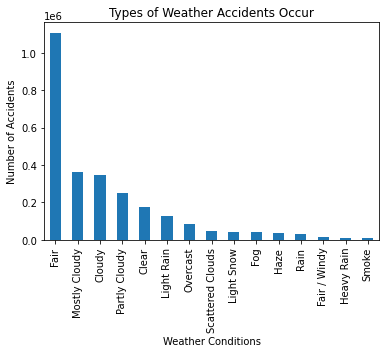

In [107]:
ax = df['Weather_Condition'].value_counts() \
.head(15) \
.plot(kind = 'bar', title='Types of Weather Accidents Occur')

ax.set_xlabel('Weather Conditions')
ax.set_ylabel('Number of Accidents')


Text(17.200000000000003, 0.5, 'Number of Accidents')

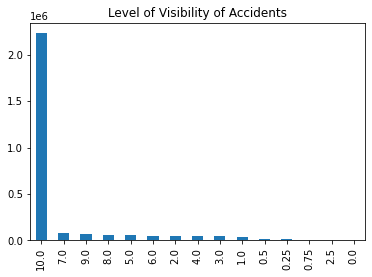

In [110]:
df['Visibility(mi)'].value_counts() \
.head(15) \
.plot(kind = 'bar', title='Level of Visibility of Accidents')

ax.set_xlabel('Visibility(mi)')
ax.set_ylabel('Number of Accidents')

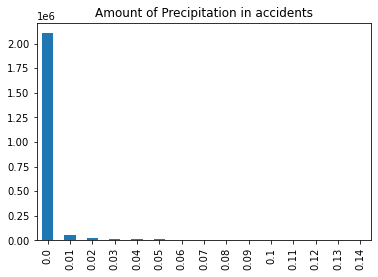

In [113]:
ax = df['Precipitation'].value_counts() \
.head(15) \
.plot(kind = 'bar', title='')


<AxesSubplot:xlabel='Severity', ylabel='Visibility(mi)'>

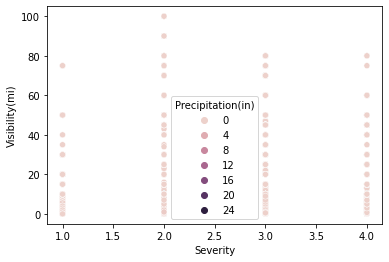

In [122]:
sns.scatterplot(data = df, x= 'Severity', y= 'Visibility(mi)', hue = 'Precipitation(in)')

In [ ]:
So it shows that weather plays very little role in the severity of accidents. So we can rejct the assumption that bad weather conditions can cause more frequent or severe accidents.

We can tackle whether or not location might play a larger factor in the accidents in another project but I do want to look at one more plot out of curiosity.

Ok interesting I see that the weather wasn't as much of a common occurence to the Accidents. But to dig deeper we can see whether the severity of accidents are determined by weather.

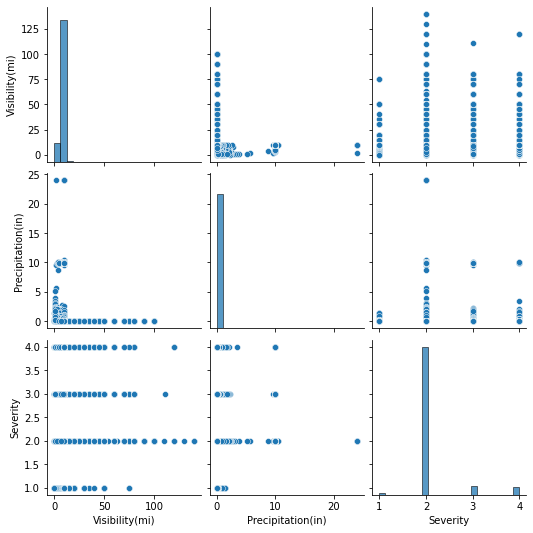

In [126]:
sns.pairplot(data = df, vars=['Visibility(mi)', 'Precipitation(in)', 'Severity'])

Besides from a few outliers , It appears that the weather isnt as much as a deciding factor when it comes to car accident occurence or severity which is really intriguing. Later in another project I can investigate weather the time of day and location would play a much larger role 